In [ ]:
#@title reading google drive files in google collab
#connects to google drive
from google.colab import drive
drive.mount('/content/drive')
#If file has already in my google drive
#using directory path: retrieves and reads file
import pandas as pd
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
dfa = pd.read_csv(dir_path + '/Kaggle_Dataset.csv')
dfa.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(319, 29)

In [ ]:
#connects to google drive
from google.colab import drive
drive.mount('/content/drive')
#using directory path: retrieves and reads file
import pandas as pd
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
dfb = pd.read_csv(dir_path + '/ExcelDataset.csv')
dfb.shape

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


(1048575, 12)

In [ ]:
#@title uploaded google drive  excel dataset has unknown values or 'nan'/np.nan values. 
#average of the columns will be calculated after editting and after the datasets have been combined
#and then will replace unknown values

#otherwise, if single dataset averages were already included, 
#we'd hv two average values in one column as the new nan values created by combination will be given a different average when calculated again.
       

In [ ]:
#@title combine datasets, then fill unknown values in each columns with the average of that column
#Combining datasets according to google drive version
#DataFrames combined along the rows i.e. they will be stacked one over above
dataframe3 = pd.concat([dfa, dfb])

#NAN (from both datasets/only found in excel though) must be made into average (or something else)
#NaN means that the particular column wasn't available in one dataset but was in the other. like AGE was in dataset but not in df1
for x in dataframe3: #assuming this will exclude the NaN in the mean #The fillna() function is used to fill NA/NaN values using the specified method.
  dataframe3[x] = dataframe3[x].fillna(dataframe3[x].mean()) #calculating average per column in combined dataset not average of each separate dataset for its respective NaN
  

#dataframe3.head()

In [ ]:
df = dataframe3
df.columns

Index(['CBC/CRP', 'Diabetes', 'Asthma', 'Heart disease', 'kidney disease',
       'Respiratory disease', 'Cancer', 'Corticosteroids', 'HEM',
       ' Immunodeficiency', 'Liver disease', 'Rheumatological disease',
       ' Chest pain', 'Fever', 'Trembling or Shakes', 'Weakness', 'Sweating',
       'Sore throat', 'dyspnea', 'Dry cough', 'Cough with sputum',
       'Fatigue, whole body hurts', 'Anosmia', 'Ageusia', 'Anorexie', 'Eczema',
       'Vertigo', 'Nausea/Diarrhea', 'Death', 'AGE', 'SEX', 'PNEUMONIA',
       'COPD', 'HIPERTENSION', 'OBESITY'],
      dtype='object')

In [ ]:
#7 common rows. and with ommissions, 1 common row was removed therefore only 6 common row bc tobacco is no longer included in either
df.shape

(1048894, 35)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
#connects google drive to collab

Mounted at /content/drive


In [ ]:
import os
#defines directory path
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
print("dir_path:", dir_path)
files = os.listdir(dir_path)  # Gets all the files in directory (dir_path)
print(f"Files in current directory '{dir_path}': {files}") #prints directory path and the files in the directory

dir_path: /content/drive/MyDrive/AI Inspirit/COVID DATASETS
Files in current directory '/content/drive/MyDrive/AI Inspirit/COVID DATASETS': ['ExcelDataset.csv', 'Kaggle_Dataset.csv', 'merged_dataset1.csv']


In [ ]:
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
df.to_csv(dir_path + '/merged_dataset1.csv', index=False) 
#this puts the dataset above into my google drive
# or it will remotely edit the named dataset in my google drive based on the changes I make in the code above

In [1]:
#connects to google drive
from google.colab import drive
drive.mount('/content/drive')
#using directory path: retrieves and reads file
import pandas as pd
dir_path = "/content/drive/MyDrive/AI Inspirit/COVID DATASETS"
df = pd.read_csv(dir_path + '/merged_dataset1.csv')

Mounted at /content/drive


In [2]:
df.shape

(1048894, 35)

In [2]:
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size = 0.2, random_state = 1)


In [3]:
from imblearn.over_sampling import SMOTE
#with smote
smote = SMOTE(sampling_strategy='minority')
X = train_df.drop("Death", axis=1)
y = train_df["Death"]
X_resampled, y_resampled = smote.fit_resample(X, y)
assert X_resampled.shape[0] > X.shape[0]
#without smote
#X = train_df.drop("Death", axis=1)
#y = train_df['Death']

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)

In [5]:
#with smote
model.fit(X_resampled, y_resampled)
#without smote
#model.fit(X, y)

LogisticRegression(max_iter=10000)

In [6]:
#testing variables shouldn't be augmented
X_test = test_df.drop("Death", axis=1)
y_test = test_df['Death']

In [7]:
from sklearn.metrics import accuracy_score 
#with smote = 0.8627031304372696, without smote = 0.932161941853093
#without smote and with omissions = 0.9320284680544764 
#with smote and with omissions = 0.8631226195186362
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.8626506943020988


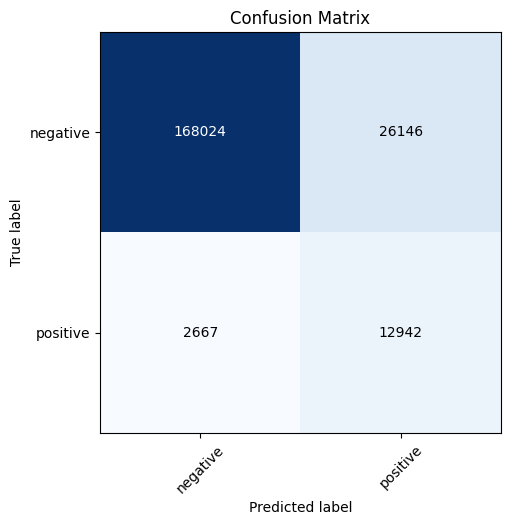

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
#using y_test values and the predictions made from X_test
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap=plt.cm.Blues)

class_names = ['negative', 'positive']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

plt.show()

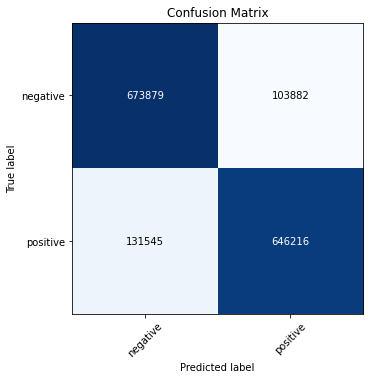

In [ ]:

#predictions using model made from  X training values (smote enhanced)
y_trainpred = model.predict(X_resampled)
#using y_resampled values and predictions from X_resampled
cm = confusion_matrix(y_resampled, y_trainpred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm, cmap=plt.cm.Blues)

class_names = ['negative', 'positive']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')

plt.show()


In [12]:
import pickle

### model.fit(X, y) ## Trained logistic regression

model_name = "SMOTELogRegModel01"
with open("/content/drive/MyDrive/AI Inspirit/MODELS" + "/" + model_name +'.pkl', 'wb') as f:
    pickle.dump(model, f)

#pickle.dump(model, open("/content/drive/MyDrive/AI Inspirit/MODELS" + model_name +'.pkl', 'wb'))

In [ ]:
# loading the Logistic Regression model from the pickle file
with open("/content/drive/MyDrive/AI Inspirit/MODELS" + "/" + model_name +'.pkl', 'rb') as f:
    model = pickle.load(f)

## Later you can run: model.predict(new_inputs)

In [19]:
import pickle
model_name = "SMOTELogRegModel01"
with open("/content/drive/MyDrive/AI Inspirit/MODELS" + "/" + model_name +'.pkl', 'rb') as f:
    model = pickle.load(f)

pred = model.predict(X_test)



In [21]:
print(pred[0:25])

print(y_test[0:25])




[1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1.]
66128     0.0
934619    0.0
117365    0.0
743451    0.0
605183    0.0
563333    0.0
92844     0.0
534965    0.0
517900    0.0
392750    0.0
479138    0.0
280044    0.0
59988     0.0
47827     1.0
713771    0.0
847010    0.0
820020    0.0
620695    0.0
668220    0.0
225008    0.0
171636    0.0
58450     1.0
471286    0.0
625806    0.0
455418    1.0
Name: Death, dtype: float64


In [26]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
display(X_test[7:15])

,CBC/CRP,Diabetes,Asthma,Heart disease,kidney disease,Respiratory disease,Cancer,Corticosteroids,HEM,Immunodeficiency,Liver disease,Rheumatological disease,Chest pain,Fever,Trembling or Shakes,Weakness,Sweating,Sore throat,dyspnea,Dry cough,Cough with sputum,"Fatigue, whole body hurts",Anosmia,Ageusia,Anorexie,Eczema,Vertigo,Nausea/Diarrhea,AGE,SEX,PNEUMONIA,COPD,HIPERTENSION,OBESITY
534965,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,0.031348,0.015674,0.068966,0.203762,0.119122,0.122257,0.053292,0.075235,0.282132,0.263323,0.018809,0.15674,0.134796,0.125392,0.094044,0.009404,0.034483,0.037618,45.0,1.0,0.0,0.0,0.0,1.0
517900,0.470219,1.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,0.031348,0.015674,0.068966,0.203762,0.119122,0.122257,0.053292,0.075235,0.282132,0.263323,0.018809,0.15674,0.134796,0.125392,0.094044,0.009404,0.034483,0.037618,66.0,0.0,0.0,0.0,0.0,1.0
392750,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,0.031348,0.015674,0.068966,0.203762,0.119122,0.122257,0.053292,0.075235,0.282132,0.263323,0.018809,0.15674,0.134796,0.125392,0.094044,0.009404,0.034483,0.037618,90.0,1.0,0.0,0.0,1.0,0.0
479138,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,0.031348,0.015674,0.068966,0.203762,0.119122,0.122257,0.053292,0.075235,0.282132,0.263323,0.018809,0.15674,0.134796,0.125392,0.094044,0.009404,0.034483,0.037618,55.0,0.0,1.0,0.0,0.0,0.0
280044,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,0.031348,0.015674,0.068966,0.203762,0.119122,0.122257,0.053292,0.075235,0.282132,0.263323,0.018809,0.15674,0.134796,0.125392,0.094044,0.009404,0.034483,0.037618,34.0,1.0,0.0,0.0,0.0,0.0
59988,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,0.031348,0.015674,0.068966,0.203762,0.119122,0.122257,0.053292,0.075235,0.282132,0.263323,0.018809,0.15674,0.134796,0.125392,0.094044,0.009404,0.034483,0.037618,28.0,1.0,0.0,0.0,0.0,1.0
47827,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,0.031348,0.015674,0.068966,0.203762,0.119122,0.122257,0.053292,0.075235,0.282132,0.263323,0.018809,0.15674,0.134796,0.125392,0.094044,0.009404,0.034483,0.037618,78.0,1.0,0.0,0.0,1.0,0.0
713771,0.470219,0.0,0.0,0.0,0.0,0.087774,0.034483,0.003135,0.015674,0.0,0.031348,0.015674,0.068966,0.203762,0.119122,0.122257,0.053292,0.075235,0.282132,0.263323,0.018809,0.15674,0.134796,0.125392,0.094044,0.009404,0.034483,0.037618,30.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
#df = df.reset_index()

In [ ]:
#df[df.index.duplicated()]

,CBC/CRP,Traveling in past 3 months ago,Connection with a suspected (covid-19) person,Diabetes,blood pressure,Asthma,Heart disease,kidney disease,Respiratory disease,Cancer,...,Tobacco,Chest pain: Diagnosis of stroke or heart disease,The Infected person ( covid-19) in family,Death,AGE,SEX,PNEUMONIA,COPD,HIPERTENSION,OBESITY


In [ ]:
df.index.is_unique

True

In [ ]:
df.shape

(1048894, 35)

In [ ]:
#error i dont understand after merging datasets #ValueError: cannot reindex from a duplicate axis
#or takes forever
import seaborn as sns
import matplotlib.pyplot as plt
df_pairplot = df[['Asthma','Heart disease','Death']]
sns.pairplot(df_pairplot, kind="kde")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df.shape)
print(df.columns)

(1048894, 35)
Index(['CBC/CRP', 'Diabetes', 'Asthma', 'Heart disease', 'kidney disease',
       'Respiratory disease', 'Cancer', 'Corticosteroids', 'HEM',
       ' Immunodeficiency', 'Liver disease', 'Rheumatological disease',
       ' Chest pain', 'Fever', 'Trembling or Shakes', 'Weakness', 'Sweating',
       'Sore throat', 'dyspnea', 'Dry cough', 'Cough with sputum',
       'Fatigue, whole body hurts', 'Anosmia', 'Ageusia', 'Anorexie', 'Eczema',
       'Vertigo', 'Nausea/Diarrhea', 'Death', 'AGE', 'SEX', 'PNEUMONIA',
       'COPD', 'HIPERTENSION', 'OBESITY'],
      dtype='object')


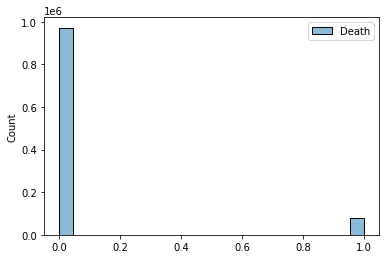

In [ ]:
#Too little death
df_histogram = df[['Death']]
sns.histplot(df_histogram)
plt.show()

<AxesSubplot:>

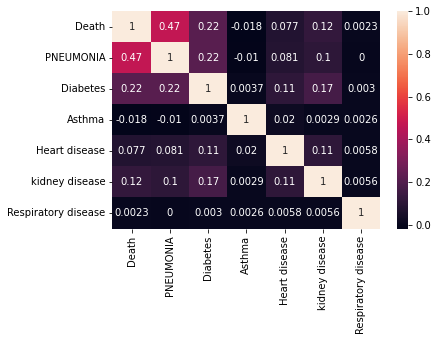

In [ ]:
df[['Death', 'PNEUMONIA', 'Diabetes', 'Asthma', 'Heart disease', 'kidney disease','Respiratory disease']].corr()
sns.heatmap(df[['Death','PNEUMONIA', 'Diabetes', 'Asthma', 'Heart disease', 'kidney disease','Respiratory disease']].corr(), annot=True)

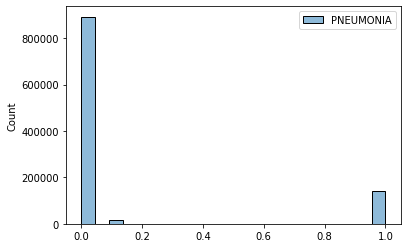

In [ ]:
df_histogram = df[['PNEUMONIA']]
sns.histplot(df_histogram)
plt.show()

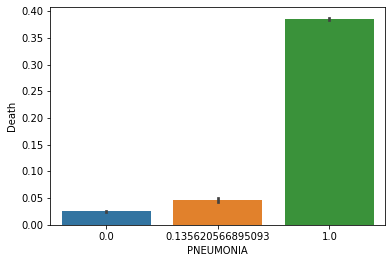

In [ ]:
sns.barplot(data=df, x='PNEUMONIA', y = 'Death')
plt.show()

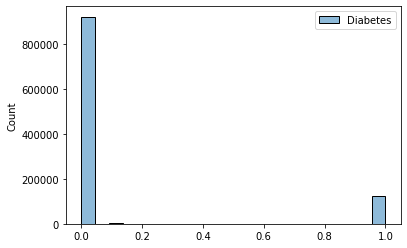

In [ ]:
df_histogram = df[['Diabetes']]
sns.histplot(df_histogram)
plt.show()

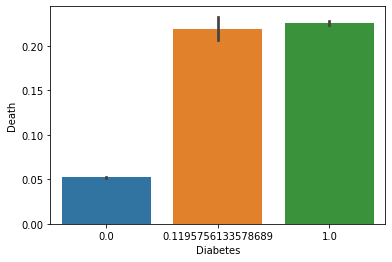

In [ ]:
sns.barplot(data=df, x='Diabetes', y = 'Death')
plt.show()

<AxesSubplot:>

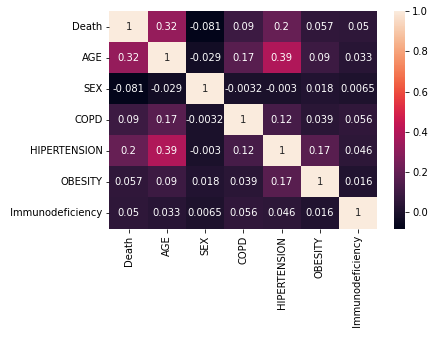

In [ ]:
df[['Death','AGE', 'SEX', 'COPD', 'HIPERTENSION', 'OBESITY', ' Immunodeficiency']].corr()
sns.heatmap(df[['Death','AGE', 'SEX', 'COPD', 'HIPERTENSION', 'OBESITY', ' Immunodeficiency']].corr(), annot=True)

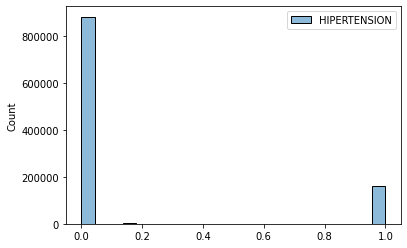

In [ ]:
df_histogram = df[['HIPERTENSION']]
sns.histplot(df_histogram)
plt.show()

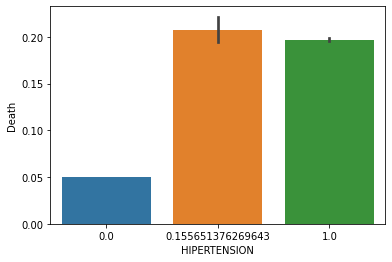

In [ ]:
sns.barplot(data=df, x='HIPERTENSION', y = 'Death')
plt.show()

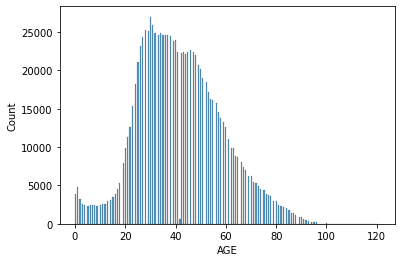

In [ ]:
df_histogram = df['AGE']
sns.histplot(df_histogram)
plt.show()

In [ ]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
df['age_bins'] = pd.cut(df['AGE'], bins=age_bins, labels=age_labels)

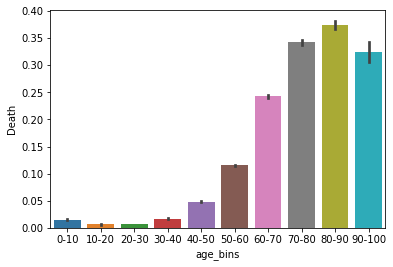

In [ ]:
sns.barplot(data=df, x='age_bins', y = 'Death')
plt.show()

<AxesSubplot:>

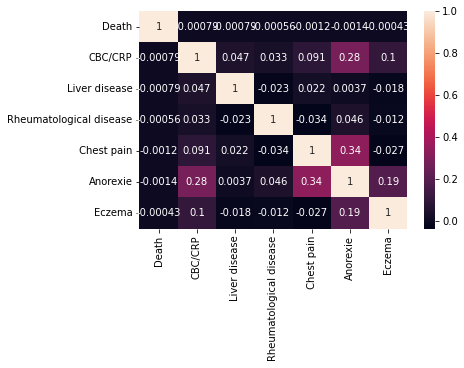

In [ ]:
df[['Death','CBC/CRP', 'Liver disease', 'Rheumatological disease',' Chest pain', 'Anorexie', 'Eczema', 'Cancer', 'Corticosteroids', 'HEM']].corr()
sns.heatmap(df[['Death','CBC/CRP', 'Liver disease', 'Rheumatological disease',' Chest pain', 'Anorexie', 'Eczema']].corr(), annot=True)

<AxesSubplot:>

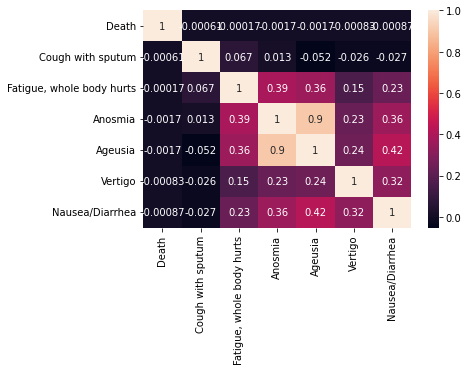

In [ ]:
df[['Death','Cough with sputum', 'Fatigue, whole body hurts', 'Anosmia', 'Ageusia','Vertigo', 'Nausea/Diarrhea']].corr()
sns.heatmap(df[['Death','Cough with sputum', 'Fatigue, whole body hurts', 'Anosmia', 'Ageusia','Vertigo', 'Nausea/Diarrhea']].corr(), annot=True)

<AxesSubplot:>

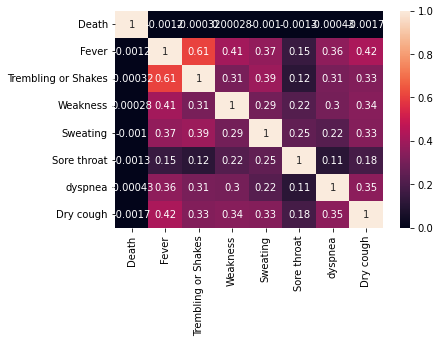

In [ ]:
df[['Death','Fever', 'Trembling or Shakes', 'Weakness', 'Sweating', 'Sore throat', 'dyspnea', 'Dry cough']].corr()
sns.heatmap(df[['Death','Fever', 'Trembling or Shakes', 'Weakness', 'Sweating', 'Sore throat', 'dyspnea', 'Dry cough']].corr(), annot=True)